What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [600]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_org = pd.read_csv("MasterCapStoneFile_01.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records

#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records

#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records


#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

In [694]:
# Removing outliers

df = df_org.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & `DB_M_Value` >0 & `DB_M_Value` <19  & `HD_M_Value` <10  & `HD_M_Value` >1  & `HBP_M_Value` >13 & `HBP_M_Value` <46 & `HC_M_Value` >22 & `HC_M_Value` <42  & `Target_Value` >1 & `Target_Value` < 5" )
print(df)






       HD_M_Value  HD_M_US  HD_M_REL_US  HBP_M_Value  HBP_M_US  HBP_M_REL_US  \
0             4.2      6.4    -0.343750         32.3      32.4     -0.003086   
2             5.8      6.4    -0.093750         33.8      32.4      0.043210   
3             4.4      6.4    -0.312500         27.4      32.4     -0.154321   
5             3.5      6.4    -0.453125         24.4      32.4     -0.246914   
6             5.5      6.4    -0.140625         28.1      32.4     -0.132716   
...           ...      ...          ...          ...       ...           ...   
27205         3.3      6.4    -0.484375         20.8      32.4     -0.358025   
27206         4.9      6.4    -0.234375         32.5      32.4      0.003086   
27207         6.7      6.4     0.046875         31.3      32.4     -0.033951   
27208         5.2      6.4    -0.187500         31.9      32.4     -0.015432   
27209         4.8      6.4    -0.250000         30.6      32.4     -0.055556   

       HC_M_Value  HC_M_US  HC_M_REL_US

In [690]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
df["Target_Value"].describe()

count    19433.000000
mean         2.807251
std          0.883082
min          0.300000
25%          2.200000
50%          2.700000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

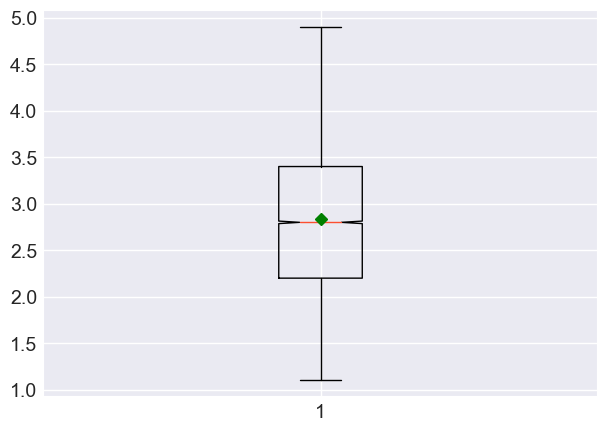

In [695]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['Target_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
df.head()

In [ ]:
#print(df.isna)
df.isna().sum()

In [ ]:
# Count and determine the outliers 
HD_degree_counts = df['HD_M_Value'].value_counts() 
HBP_degree_counts = df['HBP_M_Value'].value_counts()
HC_degree_counts = df['HC_M_Value'].value_counts(normalize=True) # get the percentage for each group.
OB_degree_counts = df['OB_M_Value'].value_counts()
DB_degree_counts = df['DB_M_Value'].value_counts()

#print(HD_degree_counts)
#print(HBP_degree_counts)
#print(HC_degree_counts)
print(OB_degree_counts)
#print(DB_degree_counts)

In [ ]:
df.describe().T

In [ ]:
# verifying outliers from the mean of both lower and upper quantiles.
# Obesity= 78
# Diabetes = 171

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records
#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

#=============================================================


df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] 
df_HC_O_Grter  = df.loc[df["HC_M_Value"] > 45.0 ] 

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#print(df_HC_O_Less["HC_M_Value"].value_counts())
#print(df_HC_O_Grter["HC_M_Value"].value_counts())




In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
sns.distplot(df['OB_M_Value'])

In [ ]:
df["OB_M_Value"].describe()



In [ ]:
np.percentile(df['OB_M_Value'], [25, 50, 75, 100])

In [ ]:
import statistics

statistics.quantiles(df['OB_M_Value'])

In [ ]:
# Quantile mean it divide data into group.
# 0.50 is the median or 50% quantile. It's 0.5 quantile. 

df_Percentile = df.describe([0.15, 0.25, 0.50, 0.75])
df_Percentile

In [ ]:
df_Percentile['HD_M_Value']

In [ ]:
df_Percentile['HD_M_Value'][0]

In [ ]:
df_Percentile['HD_M_Value']['mean']
df_Percentile['HD_M_Value']['std']
df_Percentile['HD_M_Value']['15%']

In [ ]:
#Removed 
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
df["OB_M_Value"] > 50.0 


In [ ]:
HD_degree_counts = df['HD_M_Value'].value_counts()

In [ ]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

In [ ]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

In [ ]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [ ]:
df.columns


In [606]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
df["DB_M_Value"].describe()
#df["Target_Value"].describe()



count    25125.000000
mean        10.751956
std          4.114848
min          2.100000
25%          7.900000
50%         10.000000
75%         12.900000
max         24.900000
Name: DB_M_Value, dtype: float64

In [ ]:
#df.describe().T
df["Target_Value"].describe()

In [ ]:
from scipy.stats import norm


x = np.arange(-3, 3, 0.001)

plt.plot(x,norm.pdf(x)) # normal line
plt.plot(x, norm.pdf(x, 3.2, 1.4), 'g:') # mean of 3.2 and std 1.4 of stroke
plt.plot(x, norm.pdf(x, 5.6, 2.1), 'r--') # Heart Disease

plt.legend([ 'Normal', 'Stroke', 'Heart Disease',])
plt.show()

In [ ]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x, 10.8, 4.2), 'b--') # DB
plt.legend([ 'Diabetes'])
plt.show()

In [ ]:
df.columns

In [ ]:
from scipy.stats import skew

In [ ]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

In [ ]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


In [ ]:
df.columns

In [ ]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



In [ ]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

In [ ]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

In [ ]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

In [ ]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
# create line charts

#plt.figure(figsize=(12,8()))
plt.plot(df.HD_M_Value)
plt.show()

Histrograms =  show the frequency of distribution. 

In [ ]:
from scipy.stats import poisson


In [ ]:
df["DB_M_Value"].describe()

In [ ]:
DB_degree_counts = df['DB_M_Value'].value_counts()

print(DB_degree_counts)

In [ ]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

In [ ]:
df["DB_M_Value"].describe()

In [ ]:
df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 20.0 ] # 99 records

print(df_DB_O_Less["HC_M_Value"].value_counts())
#print(df_DB_O_Greater["HC_M_Value"].value_counts())


In [ ]:
DB_skew = skew(df['DB_M_Value'])

print(DB_skew)

In [ ]:
sns.boxplot(x='DB_M_Value', data=df)


In [ ]:
sns.distplot(df['DB_M_Value'])

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['DB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [ ]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [ ]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [ ]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [ ]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [ ]:
df.columns

In [ ]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




In [ ]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




In [ ]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



In [ ]:
np.percentile(df['HD_M_Value'],1)

In [ ]:
np.percentile(df['HD_M_Value'],25)

In [ ]:
np.percentile(df['HD_M_Value'],50)

In [ ]:
np.percentile(df['HD_M_Value'],85)

In [ ]:
np.percentile(df['HD_M_Value'],95)

In [ ]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HD_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [ ]:
sns.boxplot(x='DB_M_Value', data=df)

In [ ]:
#Subplot


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [ ]:
df.describe().T

In [ ]:
# plot 
df02 = df[df['HD_M_Value'] <= 4.200000 ]
col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
sns.pairplot(df02[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
#sns.pairplot(df02[col_to_plot01], hue='OB_M_Value' )


In [ ]:
#Scattler plot - Relationship between Obesity and Diabetes.
#plt.xlabel('High Blood Pressure and Cholesterol')
#plt.ylabel('Stroke')
#plt.scatter(df.HD_M_Value, df.HC_M_Value, color= 'red', marker='*')
#plt.show()



In [ ]:
np.random.seed(19680801)
N = 50
plt.style.use('bmh')
colors = np.random.rand(N)

plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.5)
#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value',  vmin=0, vmax=100, cmap='rainbow')

#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='colors', alpha=0.9)

#plt.scatter(x='HD_M_Value', y='Target_Value', data=df)
#plt.xlim(-5, 60) # change the x and y ranges
#plt.xlim(3.0, 1.5)
plt.xlabel('High Blood Pressure vs Cholesterol', fontsize=12)
plt.ylabel('Stroke', fontsize=12)

plt.colorbar(label='Gamma Ray - API')

plt.show()

## Dividing the dataset into independent and dependent features.

In [ ]:

X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

#X

ML Analysis - LinearRegression Model

In [ ]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#80% training - it chooses ramdom samples.
len(X_train)
#20% or what ever % specified.
len(X_test)

X_train

ML Analyzing using - Linear Regression Model.

In [ ]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

In [ ]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test

print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error

# The mean of the absolute error - this is mean of the residuat error of the test.

ML Analyzing using - Decision Tree Model.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

#### ML Analyzing using - RandomForestRegressor Model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)

mean_absolute_percentage_error(y_pred,y_test)
print("r2:{} ".format(r2_score(y_pred,y_test)))
print("mae:{} ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
